In [7]:
using Turing, Distributions
using Interact, Gadfly, Reactive
using PyPlot, PyCall

In [8]:
y = [ 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 1.0, 1.0 ];
N = length(y);  K = 3;

In [9]:
@model BayesHmm(y) = begin
    s = tzeros(Int64, N)
    m = tzeros(Real, K)
    T = Array{Array}(K)
    for i = 1:K
        T[i] ~ Dirichlet(ones(K)/K)
        # m[i] ~ Normal(1, 0.1) # Defining m this way causes label-switching problem.
        m[i] ~ Normal(i, 0.01)
    end
    s[1] ~ Categorical(ones(Float64, K)/K)
    for i = 2:N
        s[i] ~ Categorical(vec(T[s[i-1]]))
        y[i] ~ Normal(m[s[i]], 0.01)
    end
    return(s, m)
end

BayesHmm (generic function with 2 methods)

In [39]:
g = Gibbs(300, HMC(1, 0.2, 5, :m, :T), PG(50, 1, :s))
c = sample(BayesHmm(y), g);

[Turing]:  Assume - `T` is a parameter
  in @~(::Any, ::Any) at compiler.jl:49
[Turing]:  Assume - `m` is a parameter (ignoring `m` found in global scope)
  in @~(::Any, ::Any) at compiler.jl:49
[Turing]:  Assume - `s` is a parameter (ignoring `s` found in global scope)
  in @~(::Any, ::Any) at compiler.jl:49
[Turing]:  Observe - `y` is an observation
  in @~(::Any, ::Any) at compiler.jl:28


In [40]:
describe(c)

Iterations = 1:300
Thinning interval = 1
Chains = 1
Samples per chain = 300

Empirical Posterior Estimates:
               Mean                       SD                           Naive SE                          MCSE                  ESS   
   s[9]    2.0000000000000    0.00000000000000000000000000   0.000000000000000000000000000   0.000000000000000000000000000 300.000000
   s[5]    2.0433333333333    0.20394656873443750555452425   0.011774860635912801423708096   0.043333333333333300119161180  22.150759
   m[1]    0.9881705745508    0.00000000000000055603901757   0.000000000000000032102927648   0.000000000000000078504622934  50.167224
   s[4]    1.0433333333333    0.20394656873443756106567548   0.011774860635912804893155048   0.043333333333333300119161180  22.150759
   s[8]    2.9566666666667    0.20394656873443750555452425   0.011774860635912801423708096   0.043333333333333293180267276  22.150759
T[2][1]    0.2415427775539    0.00000000000000000160514638   0.0000000000000000000926731

In [ ]:
#m = c[:m][132];
#s = c[:s][132];
#PyPlot.plot(y, linestyle="None", marker="+", color = "r")
#PyPlot.plot(m[s], linestyle="-", marker="*", color = "b")

Interact.Options{:SelectionSlider,Int64}(input-19: Signal{Int64}(50, nactions=1),"n",50,"50",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(68=>"68",2=>"2",89=>"89",11=>"11",39=>"39",46=>"46",85=>"85",25=>"25",55=>"55",42=>"42"…)),Any[],Any[],true,"horizontal")

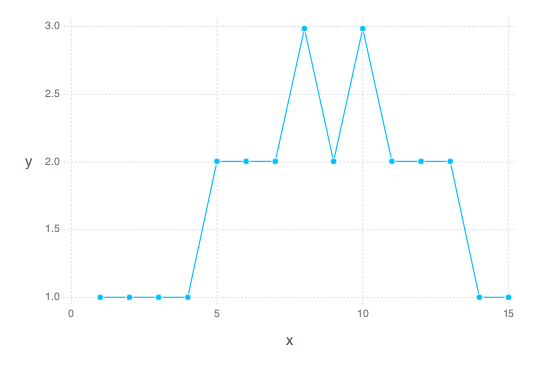

In [38]:
@manipulate for n=1:1:100
    Gadfly.plot(x=collect(1:length(y)), y=y)
    Gadfly.plot(x=collect(1:length(y)), y=c[:m][n][c[:s][n]], Geom.point, Geom.line)
end